# **Task #1 : Prediction using Supervised ML**

# **Name : JASJEET SINGH**

In this task we have to Predict the percentage of a student based on the no. of study hours.

In [2]:
#Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [4]:
#Reading the dataset from the remote link..
dataset = pd.read_csv("http://bit.ly/w-data")

In [5]:
dataset.shape   #this will return the number of rows to the number of columns..

(25, 2)

In [6]:
dataset.head()   #When no parameter is passed..By default it returns the data of the first five rows..

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [48]:
dataset.info()  #this will return the information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [49]:
dataset.describe()  #This will tell about some of the aggregate functions.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now let us find the relationship between the data

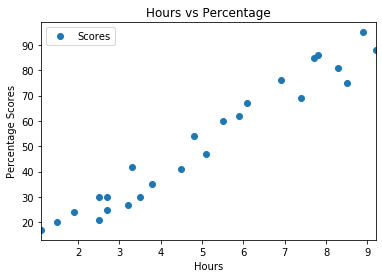

In [21]:
# Plotting the distribution of scores
dataset.plot(x='Hours',y='Scores',style='o')  #x-axis be the Hours, y-axis be the Scores.
plt.title("Hours vs Percentage")  #title name
plt.xlabel('Hours')  #x-axis name
plt.ylabel("Percentage Scores") #y-axis name.
plt.show()  

In [22]:
#From the graph we can see that there is a positve linear relation between the number of hours studied and percentage of scores

# Preparing the data

Now divide the data into "attributes"(inputs) and "labels"(outputs)

In [46]:
X = dataset.iloc[:,:-1].values  #this will return the list of hours..X points to the "Hours" column..
#show the 
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [47]:
y = dataset.iloc[:,1].values  #taking the second column..
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [50]:
#importing train_test_split library

In [52]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
#As the dataset is divided into training and testing data set..

In [63]:
#Now lets us train this data..For this We will use LinearRegression algorithm

In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
reg = LinearRegression()  #Creating its object

In [68]:
#Now lets us fit the data..(We fit only the traiing the data and after that we test on the testing data)

In [69]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
#To retrieve the intercept
print(reg.coef_)
print(reg.intercept_)

[9.91065648]
2.018160041434683


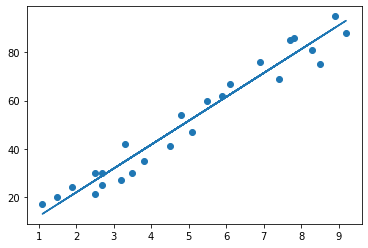

In [109]:
#Plotting the regression line..
line = reg.coef_*X+reg.intercept_  #this will create the line on the graph..

plt.scatter(X,y)
plt.plot(X, line);
plt.show()

Now Making Predictions

In [110]:
y_pred = reg.predict(X_test)  #Predicting the scores
print(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [111]:
#Comparing Actual and Predicted

In [102]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
#Show the dataFrame
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [121]:
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  4.183859899002975
Mean Squared Error :  21.5987693072174
Root Mean Square Error :  4.6474476121003665


In [126]:
hours=9.25
pred = reg.predict([[hours]])  #Making prediction
print("Number of hours = {}".format(hours))
print("Predicted Scores = {}".format(pred))

Number of hours = 9.25
Predicted Scores = [93.69173249]


In [128]:
#Now coming back to the question..for 9.25 hours what will be the percentage scores..
print("Predcited Score of a student of he/she study for 9.25 hours is {} ".format(pred))

Predcited Score of a student of he/she study for 9.25 hours is [93.69173249] 
